In [1]:
import numpy as np
import scipy as st
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
z = np.linspace(0,1,50)

points = []
for element in itertools.product(x, y, z):
    points.append(element)

def f(vals):
    return [0.1, 0.1, 0.1, 0.1]

fxyz = list(map(f, points))
xi, yi, zi = (zip(*points))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=fxyz, alpha=1.0 )
plt.show()

KeyboardInterrupt: 

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import itertools

x = np.linspace(0,1,50)
y = np.linspace(0,1,50)
z = np.linspace(0,1,50)

points = []
for element in itertools.product(x, y, z):
    points.append(element)

def f(vals):
    return [0.1, 0.1, 0.1, 0.1]

fxyz = list(map(f, points))
xi, yi, zi = (zip(*points))

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xi, yi, zi, c=fxyz, alpha=1.0 )
plt.show()

In [3]:
#http://blog.bogatron.net/blog/2014/02/02/visualizing-dirichlet-distributions/
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

corners = np.array([[0, 0], [1, 0], [0.5, 0.75**0.5]])
triangle = tri.Triangulation(corners[:, 0], corners[:, 1])

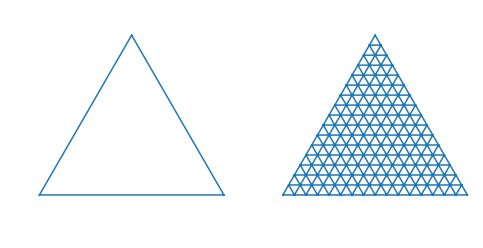

In [4]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
for (i, mesh) in enumerate((triangle, trimesh)):
    plt.subplot(1, 2, i+ 1)
    plt.triplot(mesh)
    plt.axis('off')
    plt.axis('equal')


(-0.05, 1.05, -0.04330127018922193, 0.9093266739736605)

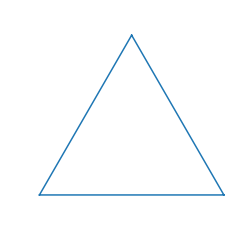

In [5]:
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=4)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, i+ 1)
plt.triplot(triangle)
plt.axis('off')
plt.axis('equal')


In [6]:
# Mid-points of triangle sides opposite of each corner
midpoints = [(corners[(i + 1) % 3] + corners[(i + 2) % 3]) / 2.0 \
             for i in range(3)]
def xy2bc(xy, tol=1.e-3):
    '''Converts 2D Cartesian coordinates to barycentric.'''
    s = [(corners[i] - midpoints[i]).dot(xy - midpoints[i]) / 0.75 \
         for i in range(3)]
    return np.clip(s, tol, 1.0 - tol)

In [7]:
from functools import reduce
class Dirichlet(object):
    def __init__(self, alpha):
        alpha = [alpha, alpha, alpha]
        from math import gamma
        from operator import mul
        self._alpha = np.array(alpha)
        self._coef = gamma(np.sum(self._alpha)) / \
                     reduce(mul, [gamma(a) for a in self._alpha])
    def pdf(self, x):
        '''Returns pdf value for `x`.'''
        from operator import mul
        return (self._coef * reduce(mul, [xx ** (aa - 1)
                                         for (xx, aa)in zip(x, self._alpha)]))

In [7]:
trimesh.x, trimesh.y

(array([0.     , 1.     , 0.5    , 0.5    , 0.75   , 0.25   , 0.25   ,
        0.875  , 0.375  , 0.625  , 0.5    , 0.125  , 0.75   , 0.625  ,
        0.375  , 0.125  , 0.1875 , 0.3125 , 0.9375 , 0.625  , 0.75   ,
        0.4375 , 0.6875 , 0.4375 , 0.5625 , 0.625  , 0.3125 , 0.5625 ,
        0.25   , 0.6875 , 0.5625 , 0.4375 , 0.0625 , 0.375  , 0.1875 ,
        0.875  , 0.8125 , 0.8125 , 0.5625 , 0.3125 , 0.5    , 0.4375 ,
        0.6875 , 0.375  , 0.5    , 0.0625 , 0.09375, 0.15625, 0.3125 ,
        0.375  , 0.21875, 0.21875, 0.28125, 0.3125 , 0.15625, 0.28125,
        0.96875, 0.8125 , 0.875  , 0.84375, 0.71875, 0.5625 , 0.65625,
        0.8125 , 0.65625, 0.78125, 0.71875, 0.46875, 0.59375, 0.46875,
        0.34375, 0.40625, 0.71875, 0.625  , 0.40625, 0.53125, 0.5625 ,
        0.5    , 0.53125, 0.40625, 0.53125, 0.6875 , 0.65625, 0.59375,
        0.28125, 0.4375 , 0.375  , 0.59375, 0.46875, 0.4375 , 0.5    ,
        0.125  , 0.34375, 0.28125, 0.21875, 0.84375, 0.78125, 0.625  ,
      

In [21]:
def draw_pdf_contours(dist,save,  nlevels=200, subdiv=8, cm='magma', **kwargs):
    import math

    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x, trimesh.y)]
    
    plt.tricontourf(trimesh, pvals, nlevels, **kwargs, cmap=cm)
    plt.axis('equal')
    plt.xlim(0, 1)
    plt.ylim(0, 0.75**0.5)
    plt.axis('off')
    plt.savefig(save)

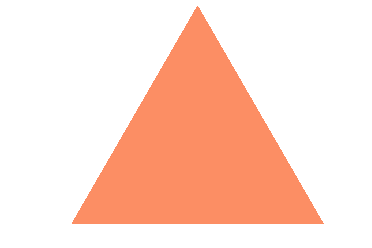

In [9]:
draw_pdf_contours(Dirichlet(1), './dir1.eps')

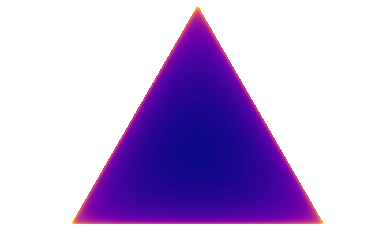

In [31]:
draw_pdf_contours(Dirichlet(0.995), 'dir0995.png', cm='plasma')

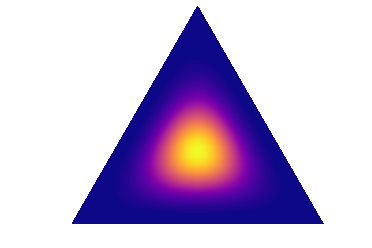

In [32]:
draw_pdf_contours(Dirichlet(5.0), 'dir5.png', cm='plasma')

In [13]:
import scipy.special as st



In [11]:
from torch.distributions.relaxed_categorical import RelaxedOneHotCategorical
import torch as t

In [14]:
c = RelaxedOneHotCategorical(t.tensor([1.0]), t.tensor([1.0, 1.0, 1.0]))

In [15]:
np.exp(c.log_prob(t.tensor([0.2, 0.2, 0.3]))).numpy()[0]

5.8593755

In [12]:
class GS:
    def __init__(self, x):
        self.c = c = RelaxedOneHotCategorical(t.tensor([x]), t.tensor([1.0, 1.0, 1.0]))
    def pdf(self, x):
        x = x *0.95+0.01
        
        return np.exp(self.c.log_prob(t.tensor(np.array(x).astype(np.float32)))).numpy()[0]

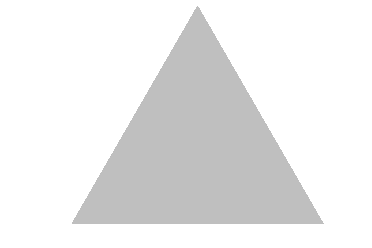

In [198]:
draw_pdf_contours(GS(0.0), 'gs0.eps')

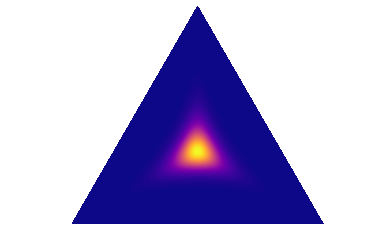

In [33]:
draw_pdf_contours(GS(5.0), 'gs5.png', cm='plasma')

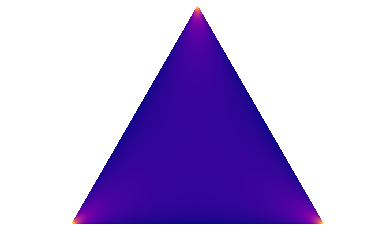

In [34]:
draw_pdf_contours(GS(0.995), 'gs0995.png', cm='plasma')

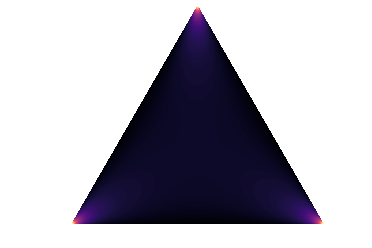

In [16]:
draw_pdf_contours(GS(1.0),  'test')

In [14]:
class GS2:
    def __init__(self, d,  x):
        self.c = c = RelaxedOneHotCategorical(t.tensor([x]), t.tensor(d))
    def pdf(self, x):
        x = x *0.95+0.01
        
        return np.exp(self.c.log_prob(t.tensor(np.array(x).astype(np.float32)))).numpy()[0]

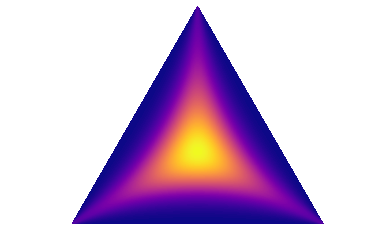

In [30]:
draw_pdf_contours(GS2(np.array([1.0, 1.0, 1.0]).astype(np.float32),2.0),  'combinations_1', cm='plasma')

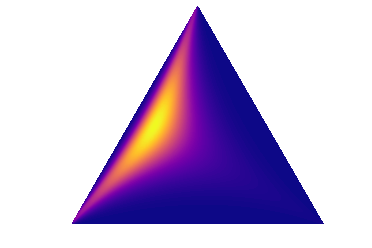

In [27]:
draw_pdf_contours(GS2(np.array([1.0, 0.1, 1.0]).astype(np.float32),2.0),  'combinations_2', cm='plasma')

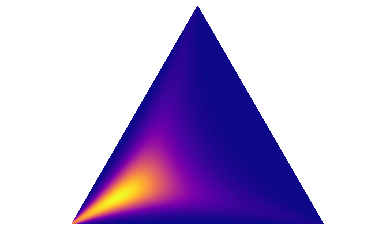

In [29]:
draw_pdf_contours(GS2(np.array([1.0, 0.1, 0.1]).astype(np.float32),2.0),  'combinations_3', cm='plasma')